# Import statements

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import os

import tensorflow as tf
from IPython.display import display, Image

import pathlib
import glob
import pickle
from imutils import paths
import cv2
#import tensorflow_datasets as tfds
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout,merge,Reshape, Activation
from keras.layers.normalization import BatchNormalization
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
import random

Using TensorFlow backend.


# Load the data

In [6]:
!wget http://data.csail.mit.edu/places/places365/val_large.tar

--2020-04-18 18:23:10--  http://data.csail.mit.edu/places/places365/val_large.tar
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2270320640 (2.1G) [application/octet-stream]
Saving to: ‘val_large.tar’

val_large.tar       100%[===================>]   2.11G  23.0MB/s    in 94s     

2020-04-18 18:24:44 (23.1 MB/s) - ‘val_large.tar’ saved [2270320640/2270320640]



In [0]:
import tarfile
tar = tarfile.open("val_large.tar")
tar.extractall()

In [0]:
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip

!mkdir div2k
!unzip -q DIV2K_train_HR.zip -d div2k
!unzip -q DIV2K_valid_HR.zip -d div2k
!ls

## train data

In [0]:
 imgPaths = list(paths.list_images(r"./div2k/DIV2K_train_HR/"))
 print(imgPaths)
 print(len(imgPaths))
 photosPaths = list(glob.glob('./div2k/DIV2K_train_HR/*.png'))
 print(len(photosPaths))

In [8]:
 photosPaths1 = list(glob.glob('./val_large/*.jpg'))
 print(len(photosPaths1))

36500


## valid data

In [4]:
 imgPaths2 = list(paths.list_images(r"./div2k/DIV2K_valid_HR/"))
 print(imgPaths2)
 print(len(imgPaths2))
 photosPaths2 = list(glob.glob('./div2k/DIV2K_valid_HR/*.png'))
 print(len(photosPaths2))

['./div2k/DIV2K_valid_HR/0869.png', './div2k/DIV2K_valid_HR/0832.png', './div2k/DIV2K_valid_HR/0870.png', './div2k/DIV2K_valid_HR/0861.png', './div2k/DIV2K_valid_HR/0828.png', './div2k/DIV2K_valid_HR/0811.png', './div2k/DIV2K_valid_HR/0804.png', './div2k/DIV2K_valid_HR/0892.png', './div2k/DIV2K_valid_HR/0826.png', './div2k/DIV2K_valid_HR/0860.png', './div2k/DIV2K_valid_HR/0872.png', './div2k/DIV2K_valid_HR/0825.png', './div2k/DIV2K_valid_HR/0857.png', './div2k/DIV2K_valid_HR/0841.png', './div2k/DIV2K_valid_HR/0807.png', './div2k/DIV2K_valid_HR/0880.png', './div2k/DIV2K_valid_HR/0802.png', './div2k/DIV2K_valid_HR/0814.png', './div2k/DIV2K_valid_HR/0820.png', './div2k/DIV2K_valid_HR/0848.png', './div2k/DIV2K_valid_HR/0842.png', './div2k/DIV2K_valid_HR/0834.png', './div2k/DIV2K_valid_HR/0836.png', './div2k/DIV2K_valid_HR/0835.png', './div2k/DIV2K_valid_HR/0839.png', './div2k/DIV2K_valid_HR/0818.png', './div2k/DIV2K_valid_HR/0810.png', './div2k/DIV2K_valid_HR/0859.png', './div2k/DIV2K_vali

## display 2 images


In [0]:
#display 2 images
sample_images = glob.glob('./div2k/DIV2K_train_HR/*.png')[:2]
for file_path in sample_images:
  display(Image(file_path))

# Process the data

## Photos without noise

In [5]:
data_train = []
for imgPath in photosPaths: 
   img = cv2.imread(imgPath, cv2.IMREAD_COLOR)
   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   img = cv2.resize(img,(200,200))
   img = np.asarray(img)
   img = img.astype(np.float32)
   img= img/255.0
   data_train.append(img)
data_train=np.array(data_train)
#print(data[0])
print(len(data_train))
print(data_train.shape)

data_valid = []
for imgPath in photosPaths2: 
   img = cv2.imread(imgPath, cv2.IMREAD_COLOR)
   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   img = cv2.resize(img,(200,200))
   img = np.asarray(img)
   img = img.astype(np.float32)
   img= img/255.0
   data_valid.append(img)
data_valid=np.array(data_valid)

800
(800, 200, 200, 3)


In [0]:
data_train2 = []
for i in range (3000): 
   img = cv2.imread(photosPaths1[i], cv2.IMREAD_COLOR)
   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   img = cv2.resize(img,(200,200))
   img = np.asarray(img)
   img = img.astype(np.float32)
   img= img/255.0
   data_train2.append(img)
data_train2=np.array(data_train2)

data_valid2 = []
for i in range (3000): 
   img = cv2.imread(photosPaths1[i+3001], cv2.IMREAD_COLOR)
   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   img = cv2.resize(img,(200,200))
   img = np.asarray(img)
   img = img.astype(np.float32)
   img= img/255.0
   data_valid2.append(img)
data_valid2=np.array(data_valid2)

## Photos with noise

In [0]:
noise_factor = 0.2
data_train_noise = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
data_valid_noise = data_valid + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_valid.shape)
data_train_noise = np.clip(data_train_noise, 0., 1.)
data_valid_noise = np.clip(data_valid_noise, 0., 1.)


In [0]:
noise_factor = 0.2
data_train2_noise = data_train2 + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train2.shape)
data_valid2_noise = data_valid2 + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_valid2.shape)
data_train2_noise = np.clip(data_train2_noise, 0., 1.)
data_valid2_noise = np.clip(data_valid2_noise, 0., 1.)

In [0]:
print("max : ",np.max(data_train))
print("min : ",np.min(data_train))
print("max : ",np.max(data_valid))
print("min : ",np.min(data_valid))

# Autoencoder

##Create the model

In [0]:
batch_size = 200
epochs = 20
input_img = Input(shape = (200, 200, 3))

def autoencoder(input_img):
    #encoder
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    pool1 = MaxPooling2D(pool_size=(2, 2))(c1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(c2)
    encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)

    #decoder
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    up1 = UpSampling2D((2,2))(c4)
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    up2 = UpSampling2D((2,2))(c5)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2)
    return decoded

In [0]:
autoencoder = Model(input_img, autoencoder(input_img))


## Compile the model

In [14]:
autoencoder.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.RMSprop())
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 128)       1475

## Train the model

In [0]:
autoencoder_train = autoencoder.fit(data_train_noise, data_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(data_valid_noise,data_valid))

In [0]:
autoencoder_train = autoencoder.fit(data_train2_noise, data_train2, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(data_valid2_noise,data_valid2))

Train on 3000 samples, validate on 3000 samples
Epoch 1/20
3000/3000 [==============================] - 660s 220ms/step - loss: 0.0695 - val_loss: 0.0460
Epoch 2/20
3000/3000 [==============================] - 668s 223ms/step - loss: 0.0354 - val_loss: 0.0254
Epoch 3/20
3000/3000 [==============================] - 663s 221ms/step - loss: 0.0298 - val_loss: 0.0291
Epoch 4/20
3000/3000 [==============================] - 665s 222ms/step - loss: 0.0261 - val_loss: 0.0230
Epoch 5/20
3000/3000 [==============================] - 663s 221ms/step - loss: 0.0231 - val_loss: 0.0291
Epoch 6/20
 800/3000 [=======>......................] - ETA: 6:43 - loss: 0.0225

# Test the model

## Plot the training and validation loss

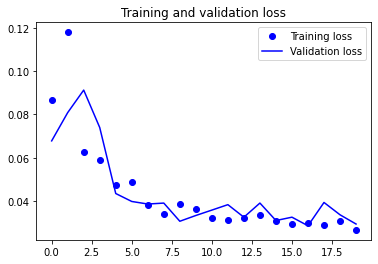

In [13]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
decoded_imgs = autoencoder.predict(data_valid_noise)

## Show some result images

In [0]:
n = 5
plt.figure(figsize=(15,8))
for i in range(n):
    #disp original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(data_valid_noise[i].reshape(200,200,3))
    plt.plasma()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(200,200,3))
    plt.plasma()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
data_test = []
for i in range (20): 
   img = cv2.imread(photosPaths1[i], cv2.IMREAD_COLOR)
   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   img = cv2.resize(img,(200,200))
   img = np.asarray(img)
   img = img.astype(np.float32)
   img= img/255.0
   data_test.append(img)
data_test=np.array(data_test)

In [0]:
noise_factor = 0.2
data_test_noise = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)
data_test_noise = np.clip(data_test_noise, 0., 1.)

## test with images from the Places dataset

In [0]:
decoded_imgs = autoencoder.predict(data_test_noise)

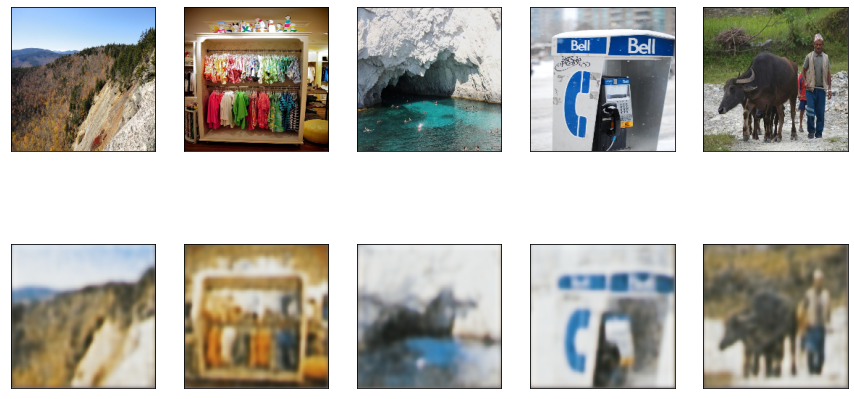

In [25]:
n = 5
plt.figure(figsize=(15,8))
for i in range(n):
    #disp original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(data_test[i].reshape(200,200,3))
    plt.plasma()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(200,200,3))
    plt.plasma()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()